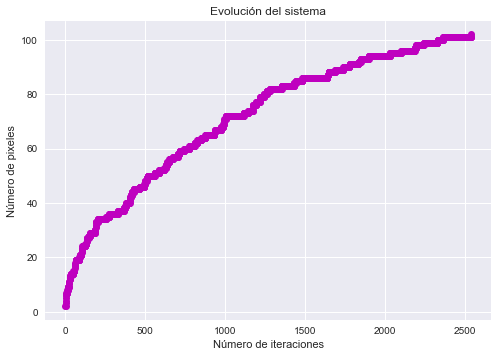

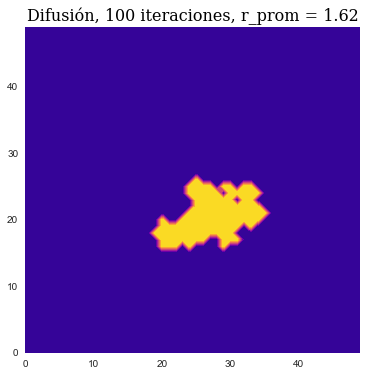

In [4]:
#Importamos librerias necesarias
import matplotlib.pyplot as plt 
import numpy as np
import random 
from matplotlib import animation
from copy import copy


#Damos formato de estilo a las gráficas
plt.style.use(['seaborn']) 
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

#Inicialización del sistema
N = 50 #Numero de elementos, debe ser impar
pasos = 100 #Numero de iteraciones
sistema = np.zeros((N,N),dtype=int) #Matriz inicial
num_ite = []
num_cuadros = []
difusion = []#Almacena las posiciones 
#config = []
semilla = int((N-1)/2) #Numero que nos asegura posicionarnos en el centro del arreglo
sistema[semilla,semilla] = 1 #Colocamos la semilla
difusion.append((semilla,semilla)) 

#Indices sobre los que corre la posicion de los pixeles
nx=0
ny=0
k=0
r_list = [] #Distancias que si cumplen el valor del criterio
i=0 #Detener la iteracion 
step=0
while step <= pasos:
    i, j = random.choice(difusion) #Elegimos un pixel con valor 1
    nx = i + random.randint(-1,1) #Nos podemos mover a la izquierda o a la derecha de forma aleatoria
    ny = j + random.randint(-1,1) #Nos podemos mover arriba o abajo de forma aleatoria
    while nx < 0 or nx> N-1 or ny<0 or ny>N-1: #Nos aseguramos de que siempre tengamos 8 vecinos
        nx = i + random.randint(-1,1) 
        ny = j + random.randint(-1,1)
        
    pi,pj = difusion[-1] #Extraemos el ultimo elemento de la lista
    r = np.sqrt((pi-nx)**2 + (pj-ny)**2) #Calculamos la distancia con los indices de la posicion
    criterio = 2.5 #Distancia de corte
    if sistema[nx,ny] == 0 and r<criterio: #Si tenemos un cero y además se cumple la condición 
        sistema[nx,ny]=1                   #cambiamos el 0 por un 1
        r_list.append(r)                   #Guardamos el valor del radio
        #config.append(copy(sistema))
        difusion.append((nx,ny))
        step +=1
    num_cuadros.append(len(difusion))
    k+=1
    num_ite.append(k)
    
#grafica estado final
plt.figure()
plt.plot(num_ite,num_cuadros,"om")
plt.ylabel("Número de pixeles")
plt.xlabel("Número de iteraciones")
plt.title("Evolución del sistema")
plt.show()
plt.figure(figsize = (6,6))
plt.title('Difusión, {} iteraciones, r_prom = {:3.2f}'
          . format(pasos,  np.mean(r_list)),
          fontdict = font)

plt.contourf(sistema, cmap = 'plasma')
plt.show()



